#### 1. Given an array of integers nums[] and an integer target, return indices of the two numbers such that their sum is equal to the target. Note: Assume that there is exactly one solution, and you are not allowed to use the same element twice. 

```py
Example 1:

Input: nums = [2,7,11,15], target = 9

Output: [0,1]

Explanation: Because nums[0] + nums[1] == 9, 
which is the required target, we return 
indexes [0,1]. (0-based indexing)

Example 2:

Input Format: nums = [3,2,4,6], target = 6

Output: [1,2]

Explanation: Because nums[1] + nums[2] == 6, 
which is the required target, we return 
indexes [1,2].
```

In [11]:
# TWO SUM PROBLEM APPROACH

# BRUTE FORCE

def TWOsumBF(arr,t):
    for i in range(len(arr)):
        for j in range(len(arr)):
            if arr[i] + arr[j] == t and j != i:
                return [i,j]
    
    return -1

# Optimized 1 -> sorting in another array and then Two pointer
def TwoSumOpt(arr,t):
    arr2 = sorted(arr)

    i = 0
    j = len(arr)-1
    n1 = None
    n2 = None
    res = []
    
    while i<j:
        if arr2[i]+arr2[j] == t:
            n1 = arr2[i]
            n2 = arr2[j]
            break

        elif arr2[i] + arr2[j]>t:
            j -= 1
        
        else:
            i += 1

    for i in range(len(arr)):

        if arr[i] == n1:
            res.append(i)
        elif arr[i] == n2:
            res.append(j)

    return res

# 3. Optimized approach 2 sum using Hashing o(n)t.c and o(n)s.c.

def twosumHash(arr,t):

    required = {}
    
    for i in range(len(nums)):

        if t - nums[i] in required:
            return [required[t - nums[i]], i]
        
        else:
            required[nums[i]] = i

nums = [2,7,11,15]
t = 9
print(twosumHash(nums,t))

[0, 1]


### 2. Sort Array containing 0's, 1's and 2's

```py
Example 1:

Input: nums = [2,0,2,1,1,0]
Output: [0,0,1,1,2,2]

Input: nums = [2,0,1]
Output: [0,1,2]

Input: nums = [0]
Input: nums = [0]
```

In [4]:
# Brute force

def bruteForce012(arr):
    return sorted(arr)

nums = [2,0,2,1,1,0]


# Optimized O(n) T.C. O(1)S.C.

def optimizedsort012(arr):
    zero = 0
    one = 0
    two = 0

    for i in arr:
        if i == 0:
            zero += 1
        
        elif i == 1:
            one += 1
        
        else:
            two += 1

    i = 0
    while zero:
        arr[i] = 0
        i += 1
        zero -= 1

    while one:
        arr[i] = 1
        i += 1
        one -= 1

    while two:
        arr[i] = 2
        i += 1
        two -= 1
    
    return arr

print(optimizedsort012(nums))

[0, 0, 1, 1, 2, 2]


#### 3. Given an array of N integers, write a program to return an element that occurs more than N/2 times in the given array. You may consider that such an element always exists in the array.

```py

Example 1:

Input Format: N = 3, nums[] = {3,2,3}

Result: 3

Explanation: When we just count the occurrences of each number and compare with half of the size of the array, you will get 3 for the above solution. 

Example 2:

Input Format:  N = 7, nums[] = {2,2,1,1,1,2,2}

Result: 2

Explanation: After counting the number of times each element appears and comparing it with half of array size, we get 2 as result.

```


In [12]:
# BRUTE FORCE IS TO RUN TWO LOOPS AND CHECK THE ELEMENT THAT OCCOURS MAXIMUM NUMBER OF TIMES

# Dictionary method

def dictMaxEle(arr):  # O(n) T.C. O(n) S.C.
    d = {}
    for i in arr:
        if i in d:
            d[i] += 1
        else:
            d[i] = 1

    for k in d:
        if d[k] > len(arr)/2:
            return k

    return -1

# Best approach moore's voting algorithm

def majorityElement(arr):
    count = 0
    candidate = 0

    for i in nums:
        if count == 0:
            candidate = i

        if i == candidate:
            count += 1

        else:
            count -= 1
  
    return candidate


nums = [2,2,1,1,1,2,2]
print(majorityElement(nums))


2


#### 4. KADANES ALGORITHM -> Given an integer array arr, find the contiguous subarray (containing at least one number) which has the largest sum and return its sum and print the subarray.

```py

Example 1:

Input: arr = [-2,1,-3,4,-1,2,1,-5,4] 

Output: 6 

Explanation: [4,-1,2,1] has the largest sum = 6. 

Examples 2: 

Input: arr = [1] 

Output: 1 

Explanation: Array has only one element and which is giving positive sum of 1.

```

In [12]:
# BRUTE FORCE O(N^3) T.C. & O(1) S.C. we can also do it in O(N^2)

def bruteforcekadane(arr):
    max_sum = -float('inf')

    for i in range(len(arr)):
        for j in range(i,len(arr)):           
            curr_sum = 0
            for k in range(i,j+1):
                curr_sum += arr[k]
            max_sum = max(curr_sum, max_sum)
        
    return max_sum

nums = [-2,1,-3,4,-1,2,1,-5,4] 
print(bruteforcekadane(nums))


6


In [17]:
# Optimized solution using Kadanes's Algorithm

def KadanesAlgo(arr):
    max_sum = -float('inf')
    curr_sum = 0
    s = 0
    e = 0

    for i in range(len(arr)):
        curr_sum += arr[i]
        
        if curr_sum>max_sum:
            max_sum = curr_sum
            e = i
        
        if curr_sum<0:
            curr_sum = 0
            s = i+1

    return max_sum,s,e

nums = [-2,1,-3,4,-1,2,1,-5,4] 
m_s, s, e = KadanesAlgo(nums)

print("maximum sum is: ", m_s)
print("subarray is: ",end="")
for i in range(s,e+1):
    print(nums[i], end = " ")
print(" ")


maximum sum is:  6
subarray is: 4 -1 2 1  


#### Subarray with Given Sum. Given an array and a sum k, generate the subarray whose elements sum to k.

```py
Example 1:
Input:
 arr = {1, 7, 3, 9}, k = 10

Output: 7 3
Explanation:
 Of all the subarrays, 7 and 3 sums to 10.

Example 2:
Input: arr = {2,1,3,4,5,6}, k = 10
Output: 2 1 3 4
Explanation: Of all the subarrays, 2, 1, 3 and 4 sums to 10
```


In [73]:
# BRUTE FORCE APPROACH IS TO FIND ALL POSSIBLE SUBARRAYS IN O(N^3) T.C.

# Optimized approach is by using Sliding Window approach in O(N) T.C. and O(1) S.C.

def slidingWindow(arr, t):
    left = 0
    right = 0
    curr_sum = 0

    while left < len(arr):

        if curr_sum > t:
            curr_sum -= arr[left]
            left += 1

        elif curr_sum < t:
            curr_sum += arr[right]
            right += 1

        else:
            print("Subarray with given sum is: ", arr[left:right])
            return left,right-1

        

nums = [2,1,3,4,5,6]
t = 11
print(slidingWindow(nums,t))

Subarray with given sum is:  [5, 6]
(4, 5)


#### You are given an array of prices where prices[i] is the price of a given stock on an ith day. You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock. Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

```py
Example 1:

Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and 
sell on day 5 (price = 6), profit = 6-1 = 5.

Note: That buying on day 2 and selling on day 1 
is not allowed because you must buy before 
you sell.

Example 2:

Input: prices = [7,6,4,3,1]
Output: 0
Explanation: In this case, no transactions are 
done and the max profit = 0.
```

In [77]:
# BRUTE FORCE METHOD BY COMPARING EVERY POSSIBLE PROFIT IN STOCKS

def StocksBF(arr):
    max_profit = -float('inf')
    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            curr_profit = arr[j] - arr[i]
            max_profit = max(max_profit, curr_profit)

    return max_profit if max_profit > 0 else 0

nums = [7,1,5,3,6,4]
print(StocksBF(nums))


5


In [81]:
# OPTIMIZED SOLUTION

def Stocks_max(arr):
    
    maxPro = 0
    minPrice = float('inf')

    for i in range(len(arr)):
        
        if arr[i] < minPrice:
            minPrice = arr[i]

        maxPro = max(maxPro, arr[i] - minPrice)
    
    return maxPro

nums = [7,1,5,3,6,4]
print(Stocks_max(nums))

5


#### Given an unsorted array Arr of N positive and negative numbers. Your task is to create an array of alternate positive and negative numbers without changing the relative order of positive and negative numbers.
#### Note: Array should start with a positive number.

```py
Input: 
N = 9
Arr[] = {9, 4, -2, -1, 5, 0, -5, -3, 2}
Output:
9 -2 4 -1 5 -5 0 -3 2
Explanation : Positive elements : 9,4,5,0,2
Negative elements : -2,-1,-5,-3

Input:
N = 10
Arr[] = {-5, -2, 5, 2, 4, 7, 1, 8, 0, -8}
Output:
5 -5 2 -2 4 -8 7 1 8 0
Explanation : Positive elements : 5,2,4,7,1,8,0
Negative elements : -5,-2,-8
```

In [88]:
def negativePositive(arr):
    neg = []
    pos = []

    for i in arr:
        if i<0:
            neg.append(i)

        else:
            pos.append(i)

    j = 0
    k = 0
    while k<len(pos) and j<len(arr):
        arr[j] = pos[k]
        k += 1
        j += 2
    
    l = 1
    m = 0
    while m<len(neg) and l<len(arr):
        arr[l] = neg[m] 
        m += 1
        l += 2

    return arr

nums1 = [9, 4, -2, -1, 5, 0, -5, -3, 2]
print(negativePositive(nums1))


[9, -2, 4, -1, 5, -5, 0, -3, 2]


####  Given an array Arr[] of integers, rearrange the numbers of the given array into the lexicographically next greater permutation of numbers.

#### If such an arrangement is not possible, it must rearrange it as the lowest possible order (i.e., sorted in ascending order).

```py
Example 1 :

Input format: Arr[] = {1,3,2}

Output: Arr[] = {2,1,3}

Explanation: All permutations of {1,2,3} are {{1,2,3} , {1,3,2}, {2,13} , {2,3,1} , {3,1,2} , {3,2,1}}. So, the next permutation just after {1,3,2} is {2,1,3}.

Example 2:

Input format: Arr[] = {3,2,1}

Output: Arr[] = {1,2,3}

Explanation: As we see all permutations of {1,2,3}, we find {3,2,1} at the last position. So, we have to return the topmost permutation.
```

In [90]:
def permuteBF(arr,l,r): # O(N! * N) T.C. bad approach brute force
    if l == r:
        print(arr)

    else:
        for i in range(l,r):
            arr[l], arr[i] = arr[i], arr[l]
            permuteBF(arr,l+1,r)
            arr[l], arr[i] = arr[i], arr[l]  # backtrack

arr = ['a','b','c']
permuteBF(arr,0,3)


['a', 'b', 'c']
['a', 'c', 'b']
['b', 'a', 'c']
['b', 'c', 'a']
['c', 'b', 'a']
['c', 'a', 'b']


#### OPTIMIZED APPROACH

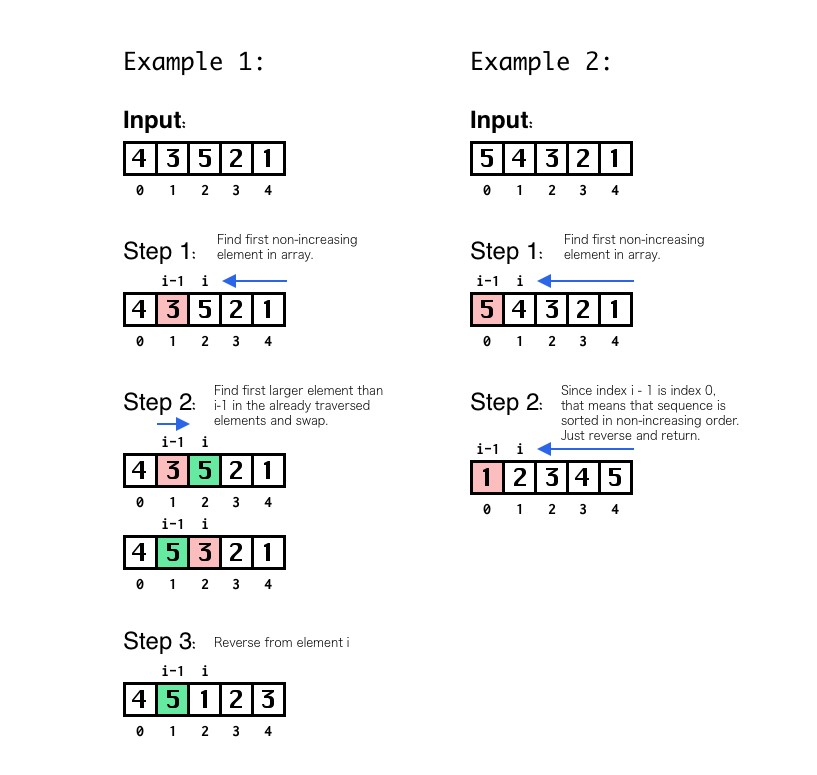


In [2]:
# Optimized approach O(N) T.C. O(1) S.C.


def permutationsOP(nums):
    
    i = j = len(nums)-1

    while i > 0 and nums[i-1] >= nums[i]:
        i -= 1

    if i == 0:   # nums are in descending order
        nums.reverse()
        return 

    k = i - 1    # find the last "ascending" position
    while nums[j] <= nums[k]:
        j -= 1

    nums[k], nums[j] = nums[j], nums[k]  

    l, r = k+1, len(nums)-1  # reverse the second part
    
    while l < r:
        nums[l], nums[r] = nums[r], nums[l]
        l += 1
        r -= 1

    return nums

nux = [1,3,2]
print(permutationsOP(nux))
        

[2, 1, 3]


#### Leaders in an Array

##### Problem Statement: Given an array, print all the elements which are leaders. A Leader is an element that is greater than all of the elements on its right side in the array.

```py
Example 1:
Input:
 arr = [4, 7, 1, 0]
Output:
 7 1 0
Explanation:
 Rightmost element is always a leader. 7 and 1 are greater than the elements in their right side.

Example 2:
Input:
 arr = [10, 22, 12, 3, 0, 6]
Output:
 22 12 6
Explanation:
 6 is a leader. In addition to that, 12 is greater than all the elements in its right side (3, 0, 6), also 22 is greater than 12, 3, 0, 6.
```

In [106]:
# BRUTE FORCE IS TO USE 2 LOOPS AND SEARCH GREATER ELEMENT TO RIGHT

# OPTIMIZED APPROACH 

# traverse from behind and keep track of max element

def leader_ele(arr):
    n = len(arr)
    cur_max = -float('inf')
    
    for i in range(n-1,-1,-1):
        
        if arr[i] >= cur_max:
            cur_max = arr[i]
            print(cur_max, end=" ")

arr = [10, 22, 12, 3, 0, 6]
leader_ele(arr)

6 12 22 

#### You are given an array of ‘N’ integers. You need to find the length of the longest sequence which contains the consecutive elements.

```py
Example 1:

Input: [100, 200, 1, 3, 2, 4]

Output: 4

Explanation: The longest consecutive subsequence is 1, 2, 3, and 4.

Input: [3, 8, 5, 7, 6]

Output: 4

Explanation: The longest consecutive subsequence is 5, 6, 7, and 8.
```


In [7]:
# BRUTE FORCE --> SORT AND THEN FIND CONSECUTIVE SUBSEQUENCE

def LongestConseBF(arr): # O(Nlog(N)) T.C. 
    arr.sort()

    curr_max = 1
    max_len = -float('inf')

    for i in range(1,len(arr)):
        if arr[i-1] == arr[i] - 1:
            curr_max += 1
            max_len = max(curr_max,max_len)
        
        else:
            curr_max = 1
    
    return max_len
    

array = [100,200,1,2,3,4]
print(LongestConseBF(array))


4


In [15]:
# OPTIMAL APPROACH

def longestConsecOP(arr): # O(N) T.C. and O(N) S.C.
    d = {}

    for i in arr:
        if i in d:
            d[i] += 1
        else:
            d[i] = 1

    i = 0
    max_count = -float('inf')

    while i<len(arr)-1:

        # check if the element is first of the sequence
        if arr[i]-1 not in d: # then this is first element of sequence
            
            j = arr[i]
            while j in d:
                j += 1
            max_count = max(max_count, j-arr[i])

        i += 1

    return max_count


array = [100,200,1,2,3,4]
print(longestConsecOP(array))

4


#### SET MATRIX ZERO

#### Given a matrix if an element in the matrix is 0 then you will have to set its entire column and row to 0 and then return the matrix.

```py
Examples 1:

Input: matrix=[[1,1,1],[1,0,1],[1,1,1]]

Output: [[1,0,1],[0,0,0],[1,0,1]]

Explanation: Since matrix[2][2]=0.Therfore the 2nd column and 2nd row wil be set to 0.
 
Input: matrix=[[0,1,2,0],[3,4,5,2],[1,3,1,5]]

Output:[[0,0,0,0],[0,4,5,0],[0,3,1,0]]

Explanation:Since matrix[0][0]=0 and matrix[0][3]=0. Therefore 1st row, 1st column and 4th column will be set to 0
```

In [33]:
def setZeroRC(arr,n,m,i,j):
    
    for c in range(len(arr[0])):
        if arr[i][c] != 0:
            arr[i][c] = -1      # Marking visited using -1 :|

    for r in range(len(arr)):
        if arr[r][j] != 0:
            arr[r][j] = -1


def setZeroesMatrixBF(arr):  # O((N*M)*(N+M)) T.C. and O(1) S.C.
    n = len(arr)
    m = len(arr[0])

    for i in range(n):
        for j in range(m):
            if arr[i][j] == 0:
                setZeroRC(arr,n,m,i,j)

    for i in range(n):
        for j in range(m):
            if arr[i][j] == -1:
                arr[i][j] = 0
            print(arr[i][j], end= "  ")
        print("")


arr = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]
setZeroesMatrixBF(arr)

0  0  0  0  
0  4  5  0  
0  3  1  0  


In [39]:
# OPTIMIZED APPROACH 1

# STORE INFORMATION OF ZERO OCCOURENCE FOR SPECIFIC ROW AND COLUMN
# CHECK FOR R0 C0 Edge Case

def setMatrixZeroOP(arr):  # O(N*M + N*M) but O(N) S.C.
    n = len(arr)
    m = len(arr[0])

    OR = [-1]*n
    OC = [-1]*m

    for i in range(n):
        for j in range(m):
            if arr[i][j] == 0:
                OR[i] = 0
                OC[j] = 0

    for i in range(n):
        for j in range(m):
            if OR[i] == 0 or OC[j] == 0:
                arr[i][j] = 0

    for i in range(n):
        for j in range(m):
            print(arr[i][j], end= "  ")
        print("")


arr = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]
setMatrixZeroOP(arr)


0  0  0  0  
0  4  5  0  
0  3  1  0  


In [42]:
# OPTIMIZED APPROACH 2
# USING THE FIRST ROW AND FIRST COLUMN ITSELF TO STORE ZERO INFORMATION

def setZeroesMatrixO2(arr): # O(2*(N*M)) T.C. and O(1) S.C.
    n = len(arr)
    m = len(arr[0])

    col0 = 1
    
    for i in range(n):
        
        if arr[i][0] == 0:
            col0 = 0

        for j in range(m):
            if arr[i][j] == 0:
                arr[i][0] = 0
                arr[0][j] = 0
    
    for i in range(n-1,-1,-1):
        for j in range(m-1,-1,-1):
            if arr[i][0] == 0 or arr[0][j] == 0:
                arr[i][j] = 0

    if col0 == 0:
        arr[0][0] = 0

    for i in range(n):
        for j in range(m):
            print(arr[i][j], end= "  ")
        print("")

arr = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]
setZeroesMatrixO2(arr)

0  0  0  0  
0  4  5  0  
0  3  1  0  


#### ROTATE MATRIX BY 90 DEGREES

```py
Given a matrix, your task is to rotate the matrix 90 degrees clockwise.

Example 1:

Input: [[1,2,3],[4,5,6],[7,8,9]]

Output: [[7,4,1],[8,5,2],[9,6,3]]

Explanation: Rotate the matrix simply by 90 degree clockwise and return the matrix.

Example 2:

Input: [[5,1,9,11],[2,4,8,10],[13,3,6,7],[15,14,12,16]]

Output:[[15,13,2,5],[14,3,4,1],[12,6,8,9],[16,7,10,11]]

Explanation: Rotate the matrix simply by 90 degree clockwise and return the matrix
```


In [81]:
# BRUTE FORCE METHOD IS TO TAKE FIRST ROW AND APPEND IT IN LAST COLUMN OF A DUMMY MATRIX

def rotate90BF(arr): # O(N*M) T.C. and O(N) S.C.
    
    n = len(arr)
    m =len(arr[0])
    dummy = mat = [[0 for x in range(m)] for y in range(n)]

    for i in range(n):
        for j in range(m):
            dummy[j][n-i-1] = arr[i][j]
                
    for i in range(n):
        for j in range(m):
            print(dummy[i][j], end="  ")
        print("")

rotate90BF(arr)
arr = [[5,1,9,11],[2,4,8,10],[13,3,6,7],[15,14,12,16]]



15  13  2  5  
14  3  4  1  
12  6  8  9  
16  7  10  11  


In [74]:
# OPTIMIZED APPROACH

# step 1: Transpose the Matrix
# step 2: rotate each row
def revers(arr):
    j = len(arr)-1
    for i in range(j+1//2):
        arr[i],arr[j] = arr[j],arr[i]

def rotate90OP(arr):

    n = len(arr)
    m = len(arr[0])

    for i in range(n):   # Transpose
        for j in range(i,m):
            arr[j][i], arr[i][j] = arr[i][j], arr[j][i]

    for i in range(n):
        arr[i].reverse()

    for i in range(n):
        for j in range(m):
            print(arr[i][j], end="  ")
        print("")

arr = [[5,1,9,11],[2,4,8,10],[13,3,6,7],[15,14,12,16]]
rotate90OP(arr)


15  13  2  5  
14  3  4  1  
12  6  8  9  
16  7  10  11  


#### Spiral Traversal of Matrix

#### Given a Matrix, print the given matrix in spiral order.

```py
Example 1:
Input: Matrix[][] = { { 1, 2, 3, 4 },
		      { 5, 6, 7, 8 },
		      { 9, 10, 11, 12 },
	              { 13, 14, 15, 16 } }

Outhput: 1, 2, 3, 4, 8, 12, 16, 15, 14, 13, 9, 5, 6, 7, 11, 10.
Explanation: The output of matrix in spiral form.

Example 2:
Input: Matrix[][] = { { 1, 2, 3 },
	              { 4, 5, 6 },
		      { 7, 8, 9 } }
			    
Output: 1, 2, 3, 6, 9, 8, 7, 4, 5.
Explanation: The output of matrix in spiral form.
```

In [85]:
def printSpiral(arr):

    t = 0
    r = len(arr[0])-1
    l = 0
    b = len(arr)-1

    while l <= r and t <= b:
        
        for i in range(l,r + 1):
            print(arr[t][i], end=" ")
        t += 1

        for i in range(t,b+1):
            print(arr[i][r], end=" ")
        r -= 1

        if t<=b:
            for i in range(r,l-1,-1):
                print(arr[b][i], end = " ")
            b -= 1

        if l<=r:
            for i in range(b,t-1,-1):
                print(arr[i][l], end=" ")

            l += 1

arr = [[1, 2, 3, 4 ],[5, 6, 7, 8 ],[ 9, 10, 11, 12 ],[ 13, 14, 15, 16]]
printSpiral(arr)

1 2 3 4 8 12 16 15 14 13 9 5 6 7 11 10 